In [31]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn import model_selection
print(tf.__version__)

2.8.0


In [32]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Read excel file that contain data
data = pd.read_excel ('/content/drive/MyDrive/FYP/new version/Setapak.xlsx', sheet_name='Sheet1')
data = data[0::2]
# Set the index of the DataFrame to weather type
data = data.set_index("Weather")
data.head()


,Date,Time,Barometer,Highest Temperature,Lowest temperature,Average Temperature,Humidity,Wind Speed
Weather,,,,,,,,
Passing clouds,2021-01-01,00:00:00,1010.0,26.0,25.0,25.5,90.0,1.0
Passing clouds,2021-01-01,12:00:00,1009.0,31.0,27.0,29.0,64.0,5.0
Passing clouds,2021-01-02,00:00:00,1010.0,26.0,25.0,25.5,90.0,3.0
Passing clouds,2021-01-02,12:00:00,1009.0,29.0,28.0,28.5,73.0,6.0
Light rain,2021-01-03,00:00:00,1010.0,25.0,24.0,24.5,94.0,5.0


In [34]:
# Drop data during thunderstorms and raining days
data = data.drop(["Light rain", "Thunderstorms"])
data.head()

,Date,Time,Barometer,Highest Temperature,Lowest temperature,Average Temperature,Humidity,Wind Speed
Weather,,,,,,,,
Passing clouds,2021-01-01,00:00:00,1010.0,26.0,25.0,25.5,90.0,1.0
Passing clouds,2021-01-01,12:00:00,1009.0,31.0,27.0,29.0,64.0,5.0
Passing clouds,2021-01-02,00:00:00,1010.0,26.0,25.0,25.5,90.0,3.0
Passing clouds,2021-01-02,12:00:00,1009.0,29.0,28.0,28.5,73.0,6.0
Passing clouds,2021-01-04,12:00:00,1009.0,30.0,27.0,28.5,68.0,7.0


In [35]:
# Remove data's index
data = data.reset_index()

# Remove wrong data by removing data row with wind speed lower than 0
# Clean data by removing data row with wind speed higher than 15
for i in data.index:
  if ((data.loc[i, "Wind Speed"]<0)):
    data.drop(i, inplace = True)

for i in data.index:
  if ((data.loc[i, "Wind Speed"]>15)):
    data.drop(i, inplace = True)

data.describe()

,Barometer,Highest Temperature,Lowest temperature,Average Temperature,Humidity,Wind Speed
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,1009.439451,29.600499,26.972534,28.286517,75.312110,5.946317
std,1.467699,3.375678,2.625689,2.838352,14.418823,4.077176
min,1005.000000,24.000000,22.000000,23.500000,40.000000,0.000000
25%,1008.000000,27.000000,25.000000,25.500000,62.000000,2.000000
50%,1010.000000,29.000000,26.000000,27.500000,79.000000,5.000000
75%,1010.000000,33.000000,29.000000,31.000000,88.000000,10.000000
max,1017.000000,36.000000,33.000000,34.000000,98.000000,15.000000


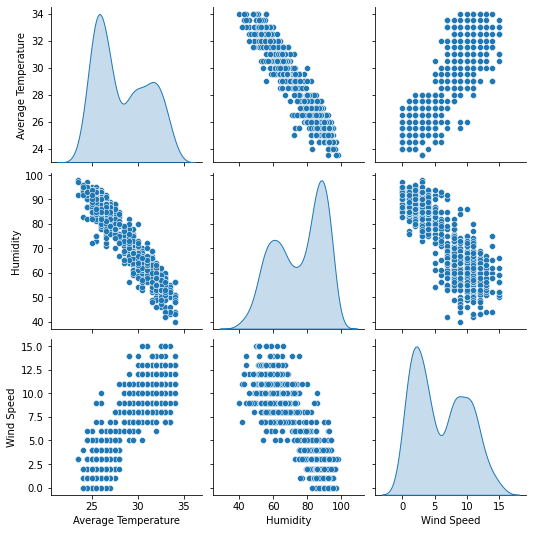

In [36]:
# Plot relationship between data
sns.pairplot(data[['Average Temperature', 'Humidity', 'Wind Speed' ]], diag_kind='kde')

In [37]:
x = data.iloc[:, 6:8]
y = data.iloc[:, 8]

In [38]:
x

,Average Temperature,Humidity
0,25.5,90.0
1,29.0,64.0
2,25.5,90.0
3,28.5,73.0
4,28.5,68.0
...,...,...
814,24.0,95.0
815,25.0,94.0
816,29.0,76.0
817,25.0,92.0


In [39]:
y

0      1.0
1      5.0
2      3.0
3      6.0
4      7.0
      ... 
814    0.0
815    2.0
816    6.0
817    1.0
818    9.0
Name: Wind Speed, Length: 801, dtype: float64

In [40]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import GRU
from keras.metrics import Accuracy
from sklearn.preprocessing import StandardScaler

model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adagrad')

print(model.summary())
history = model.fit(x,y, epochs=150, batch_size=3)

# list all data in history
print(history.history.keys())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trai

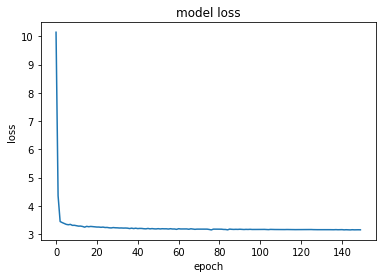

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [42]:
# Show predicted wind speed by model
data['Predicted_WindSpeed'] = model.predict (x)
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
rmse = mean_squared_error(data['Wind Speed'], model.predict (x), squared=False)
mse = mean_squared_error(data['Wind Speed'], model.predict (x))
r_squared=r2_score(data['Wind Speed'], model.predict (x))

print("The model's r2 is ", r_squared*100, "%")
print("Mean squared error is ", mse)
print("Root mean squared error is ", rmse)
data.head(10)

The model's r2 is  81.10245539444038 %
Mean squared error is  3.137485872367119
Root mean squared error is  1.7712949704572412


,Weather,Date,Time,Barometer,Highest Temperature,Lowest temperature,Average Temperature,Humidity,Wind Speed,Predicted_WindSpeed
0,Passing clouds,2021-01-01,00:00:00,1010.0,26.0,25.0,25.5,90.0,1.0,2.187424
1,Passing clouds,2021-01-01,12:00:00,1009.0,31.0,27.0,29.0,64.0,5.0,9.089490
2,Passing clouds,2021-01-02,00:00:00,1010.0,26.0,25.0,25.5,90.0,3.0,2.187424
3,Passing clouds,2021-01-02,12:00:00,1009.0,29.0,28.0,28.5,73.0,6.0,7.760430
4,Passing clouds,2021-01-04,12:00:00,1009.0,30.0,27.0,28.5,68.0,7.0,8.619633
5,Passing clouds,2021-01-05,00:00:00,1009.0,26.0,24.0,25.0,92.0,2.0,1.876854
6,Passing clouds,2021-01-05,12:00:00,1008.0,32.0,26.0,29.0,65.0,14.0,9.039171
7,Passing clouds,2021-01-06,00:00:00,1009.0,26.0,25.0,25.5,92.0,1.0,2.042669
8,Passing clouds,2021-01-06,12:00:00,1008.0,28.0,27.0,27.5,70.0,7.0,7.631101
9,Passing clouds,2021-01-07,00:00:00,1009.0,25.0,24.0,24.5,87.0,2.0,2.066142


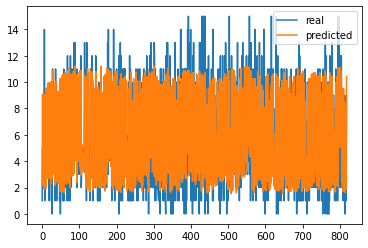

In [43]:
plt.plot (data['Wind Speed'], label='real')
plt.plot (data['Predicted_WindSpeed'], label='predicted')
plt.legend()
plt.show()

In [44]:
data.count()

Weather                801
Date                   801
Time                   801
Barometer              801
Highest Temperature    801
Lowest temperature     801
Average Temperature    801
Humidity               801
Wind Speed             801
Predicted_WindSpeed    801
dtype: int64

In [46]:
#Save excel file with predicted value
data.to_excel(r'/content/drive/MyDrive/FYP/new version/Predict_ANN.xlsx', index = False)

# Save the Tensorflow model
# Needed to be converted to C array before applied on ESP32

import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
# Convert the model to an in-memory object
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
# Write to a file
tflite_model_file = pathlib.Path('ann_model.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


48364